In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary libraries for 3D plotting
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder




In [40]:
# Load the dataset

from google.colab import drive
drive.mount('/content/drive')
# Display the first few rows of the dataset
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,General_Health,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),...,Lifestyle_Score,Healthy_Diet_Score,Smoking_Alcohol,Checkup_Exercise,Height_to_Weight,Fruit_Vegetables,HealthyDiet_Lifestyle,Alcohol_FriedPotato,Sex_Female,Sex_Male
0,0,0,0,0,0,0,0,1,10,150.0,...,5.6,3.4,-0.0,0.0,4.592774,480.0,19.04,0.0,1,0
1,3,0,1,0,0,0,1,0,10,165.0,...,3.0,2.6,0.0,0.0,2.139800,0.0,7.80,0.0,1,0
2,3,1,0,0,0,0,1,0,8,163.0,...,2.1,-0.1,0.0,4.0,1.842849,36.0,-0.21,64.0,1,0
3,0,1,1,0,0,0,1,0,11,180.0,...,7.0,5.2,0.0,4.0,1.926370,900.0,36.40,0.0,0,1
4,2,0,0,0,0,0,0,0,12,191.0,...,2.2,1.2,-0.0,0.0,2.159412,32.0,2.64,0.0,0,1


In [6]:
# Load the dataset
data = pd.read_csv('/CVD_cleaned.csv')

# Display the first few rows of the dataset
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


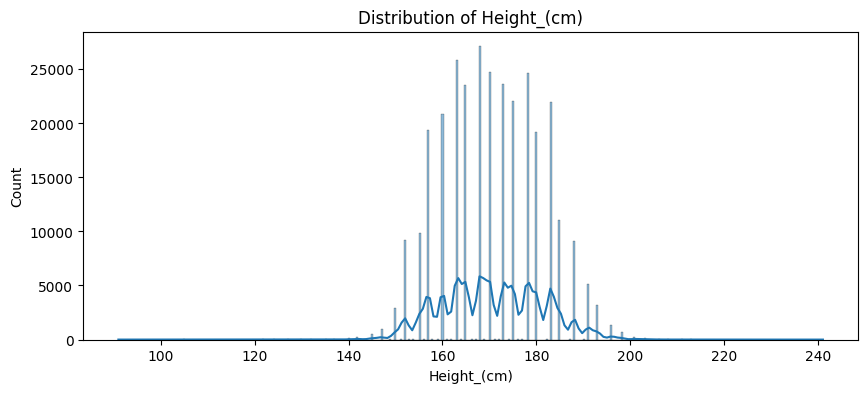

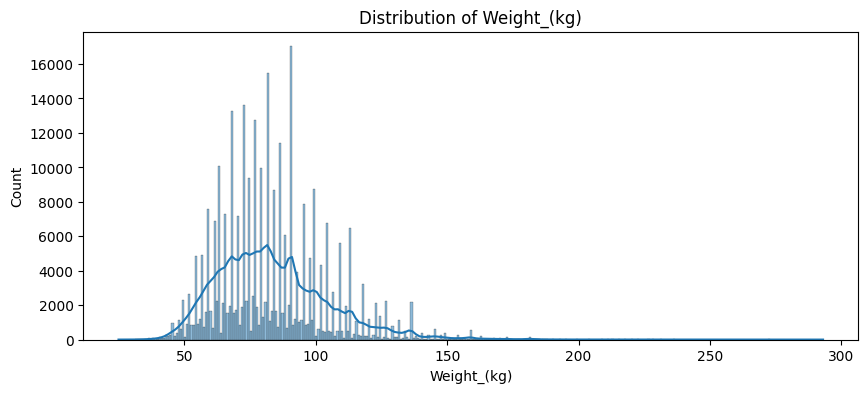

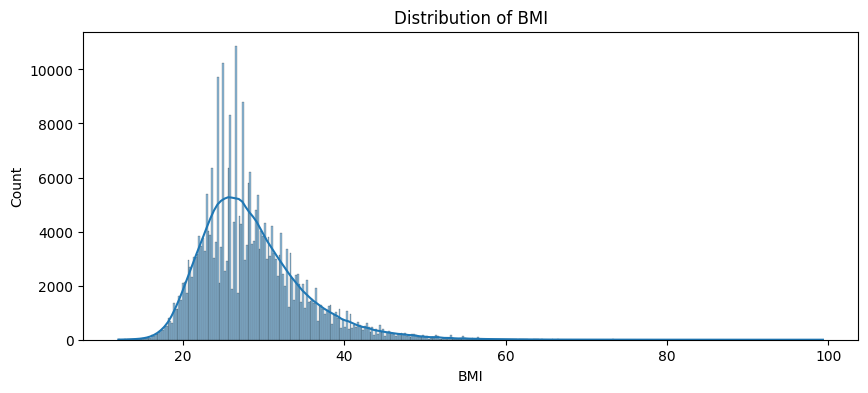

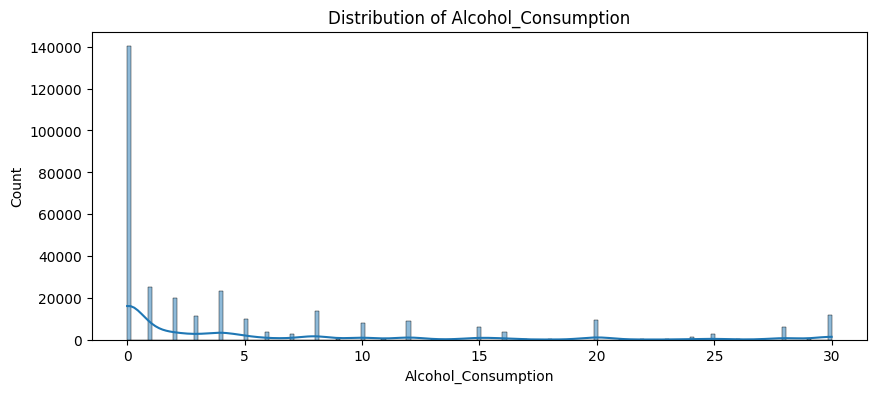

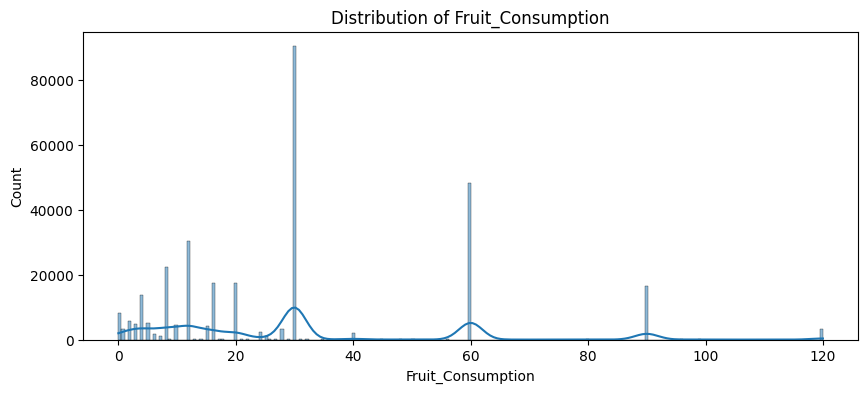

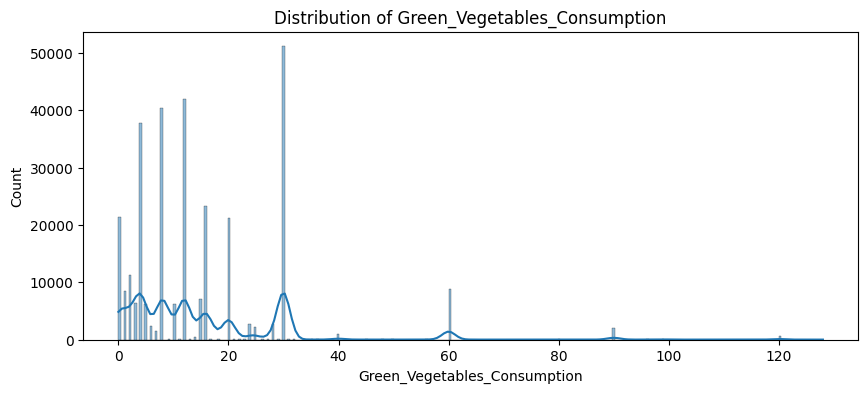

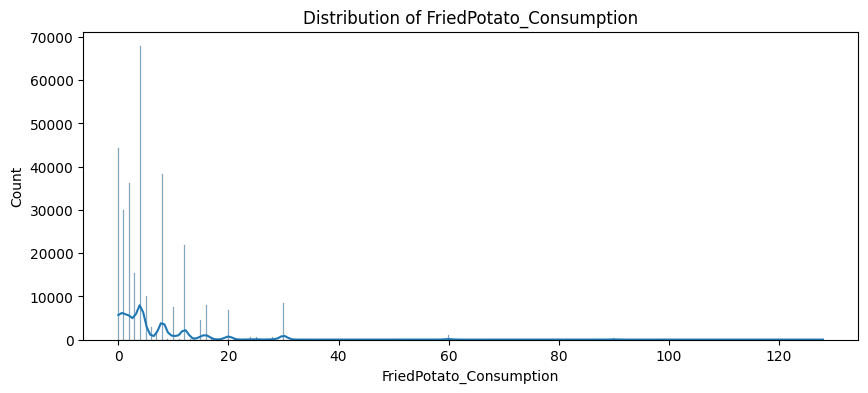

In [7]:
# Univariate Analysis
# Check the distribution of numerical features
numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=data, x=feature, kde=True)
    plt.title('Distribution of ' + feature)
    plt.show()

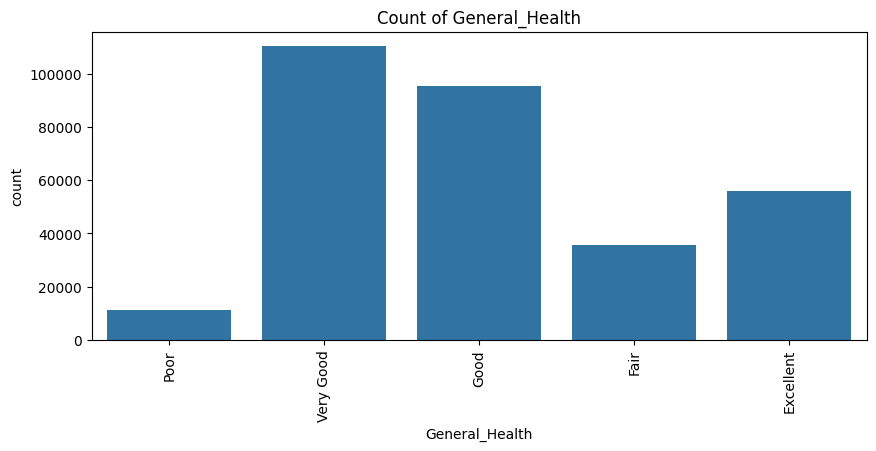

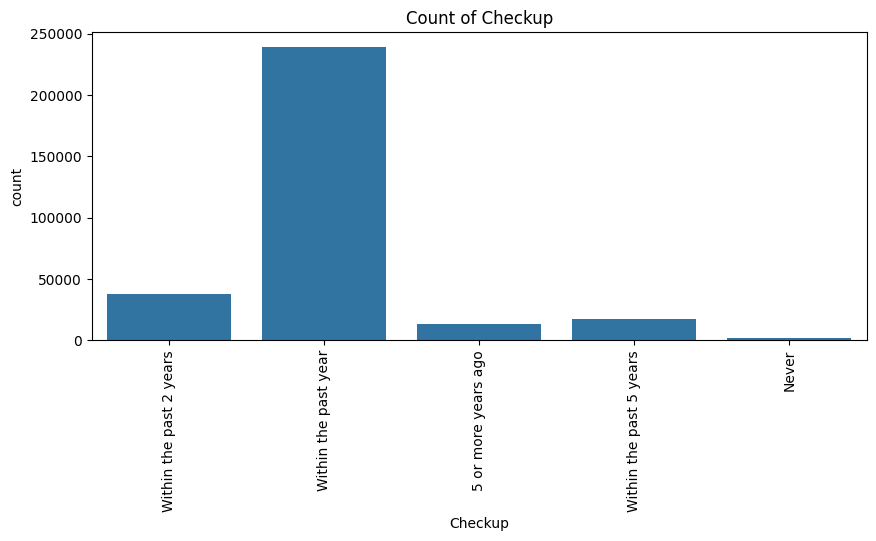

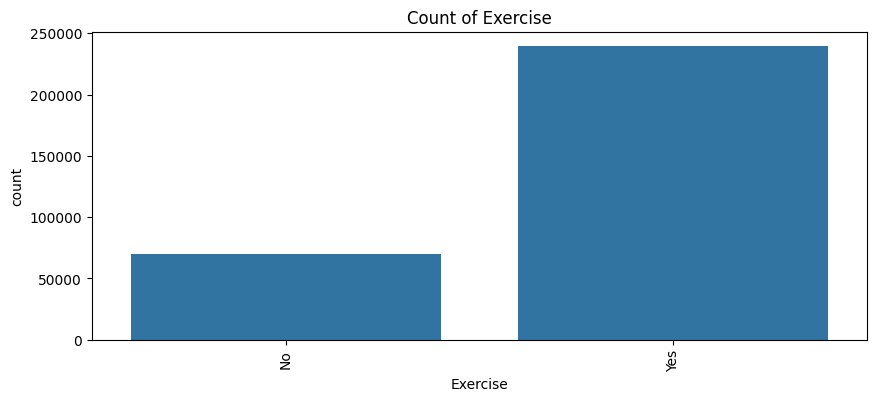

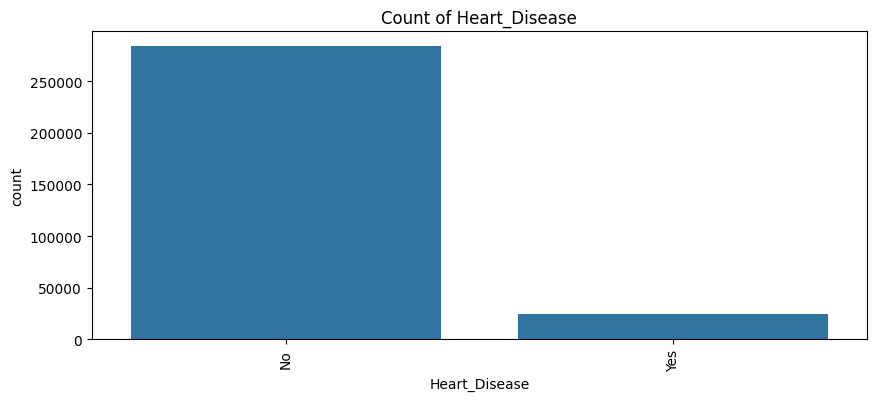

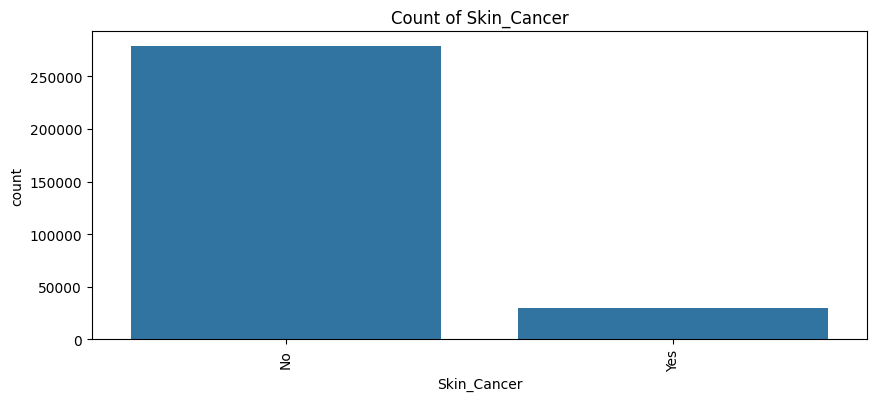

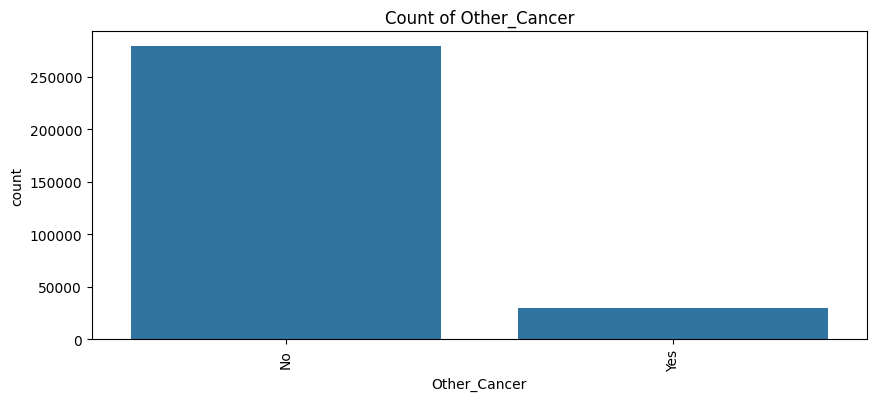

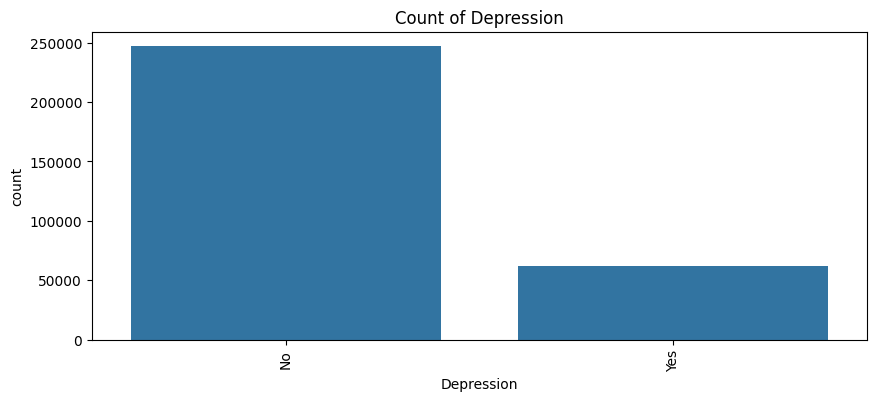

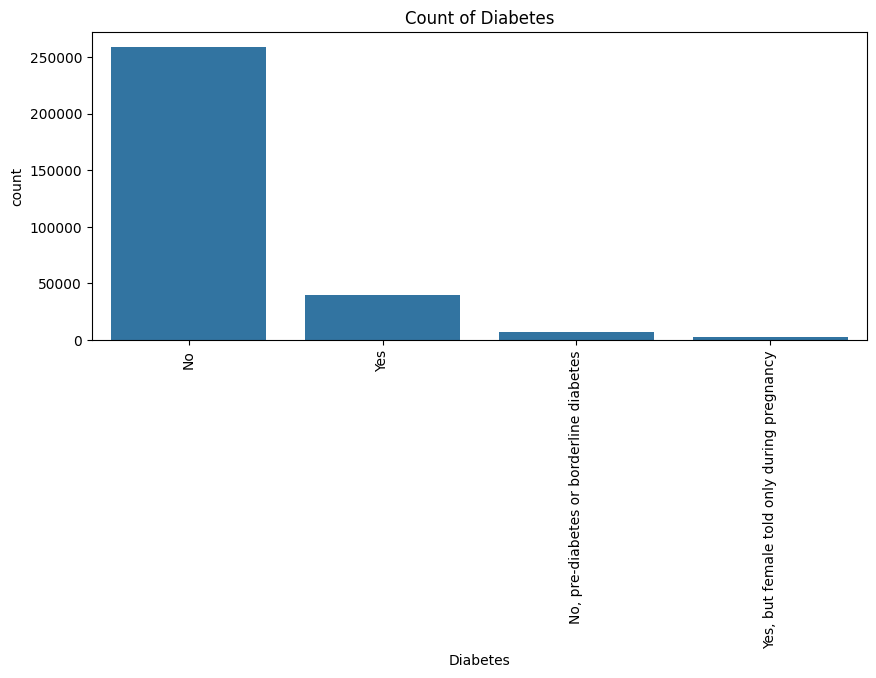

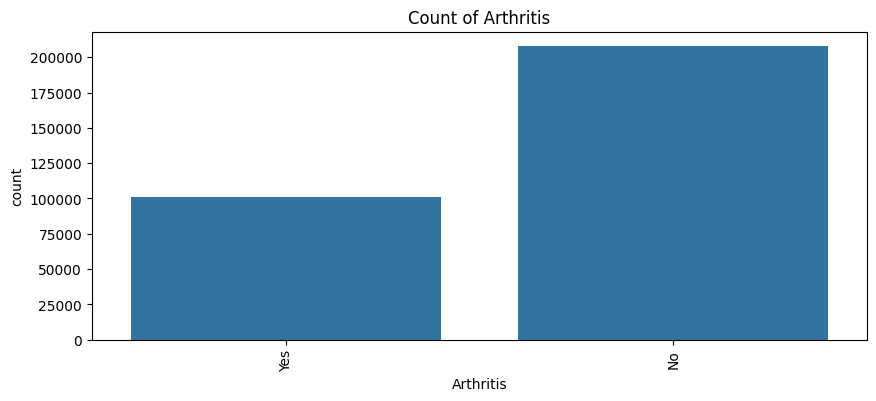

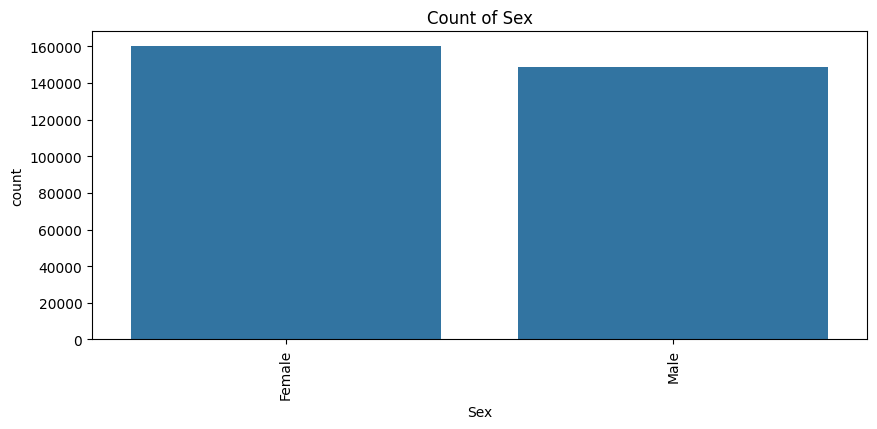

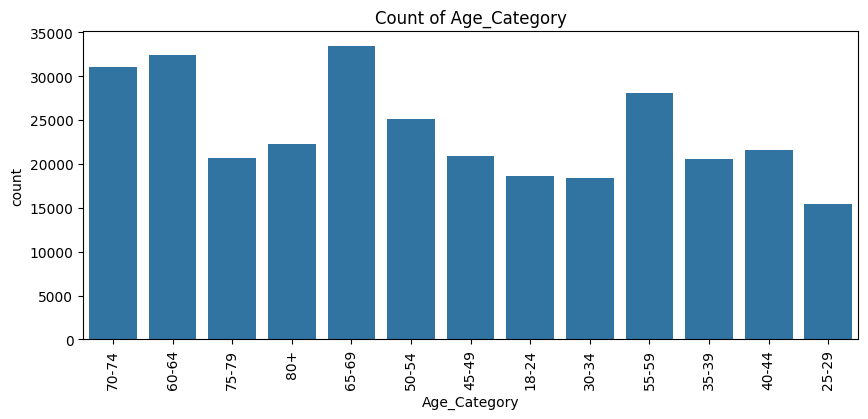

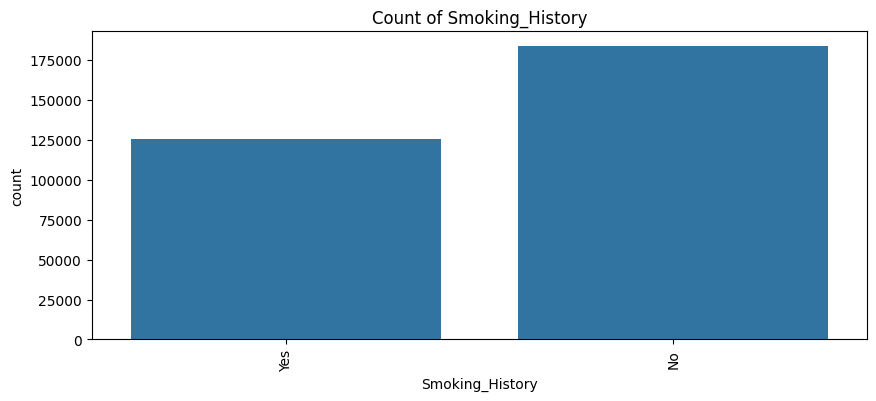

In [9]:
# Check the distribution of categorical features
categorical_features = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=feature)
    plt.title('Count of ' + feature)
    plt.xticks(rotation=90)
    plt.show()

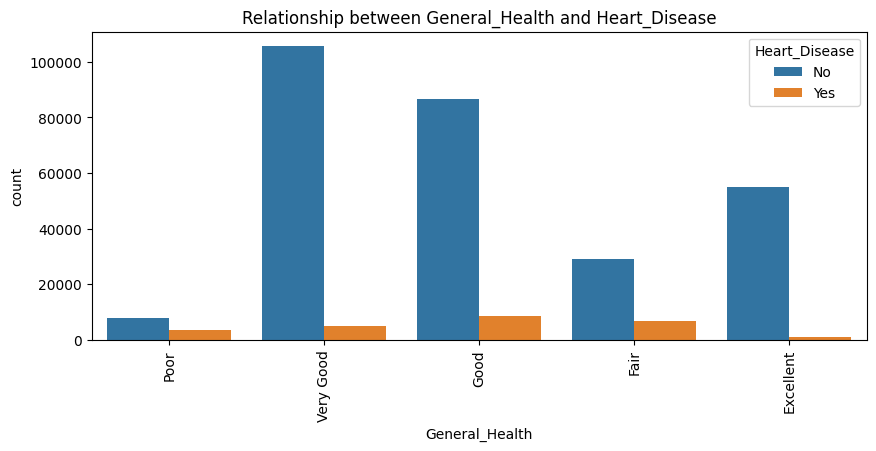

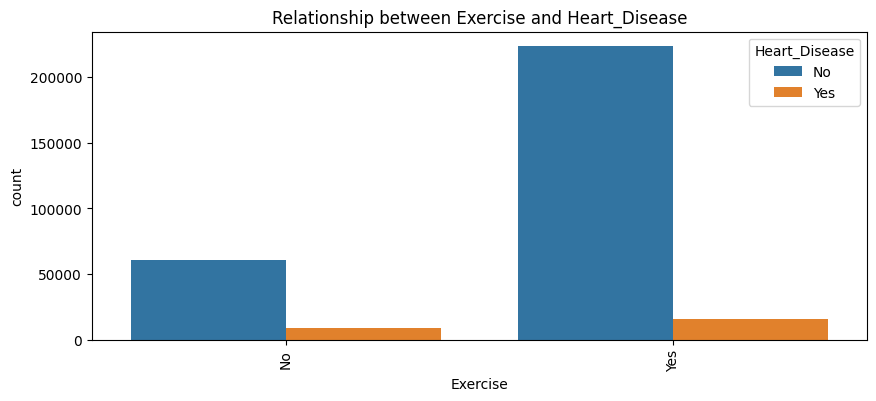

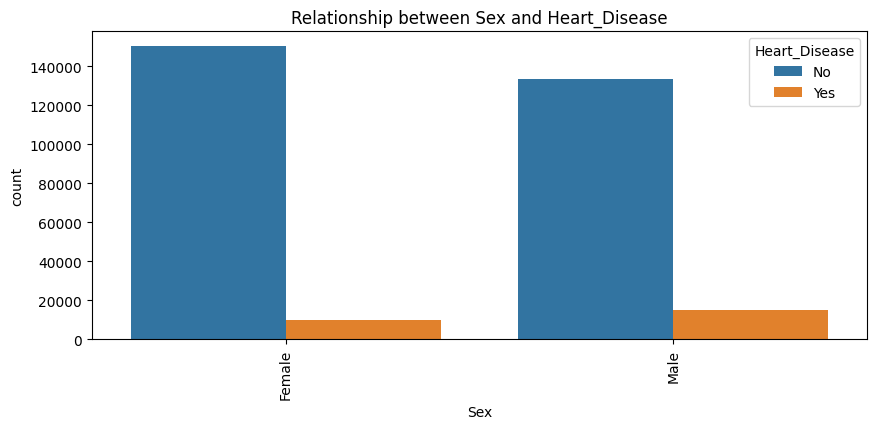

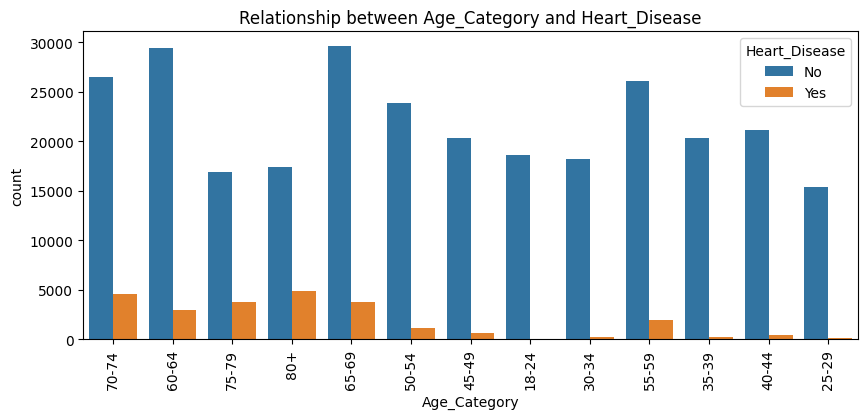

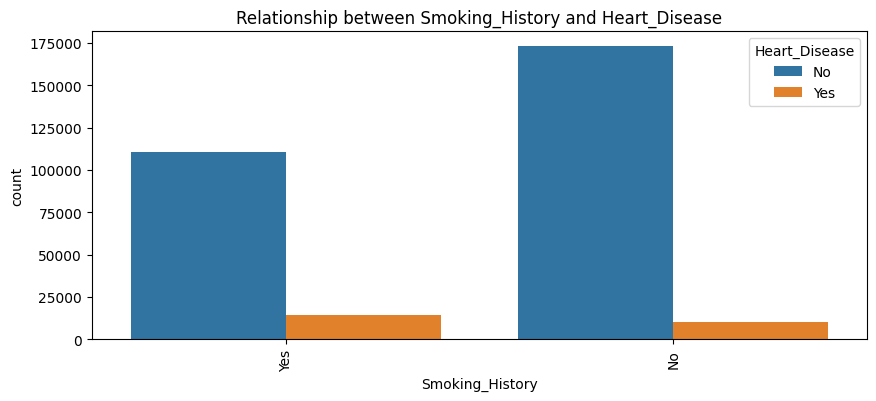

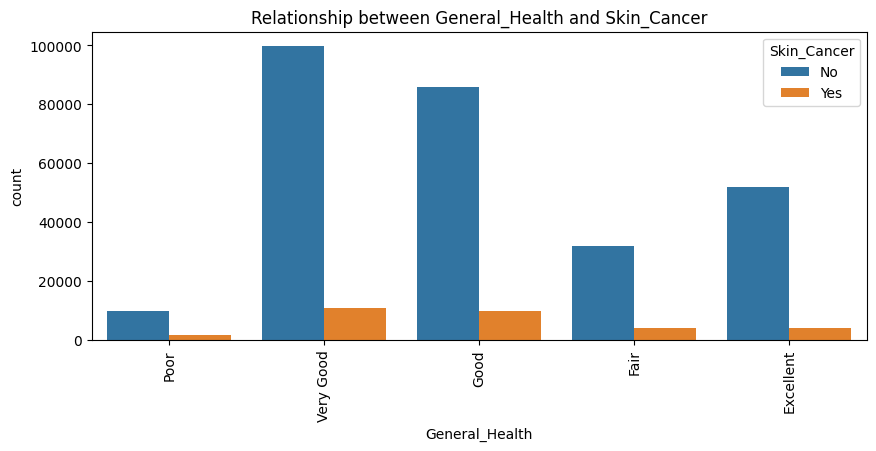

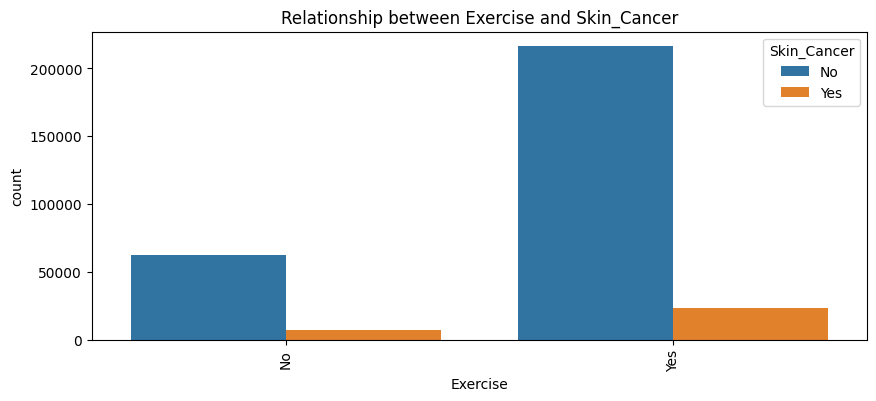

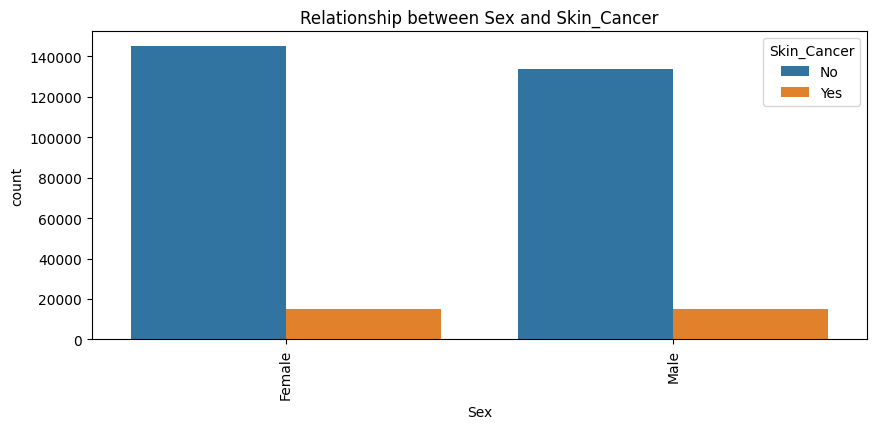

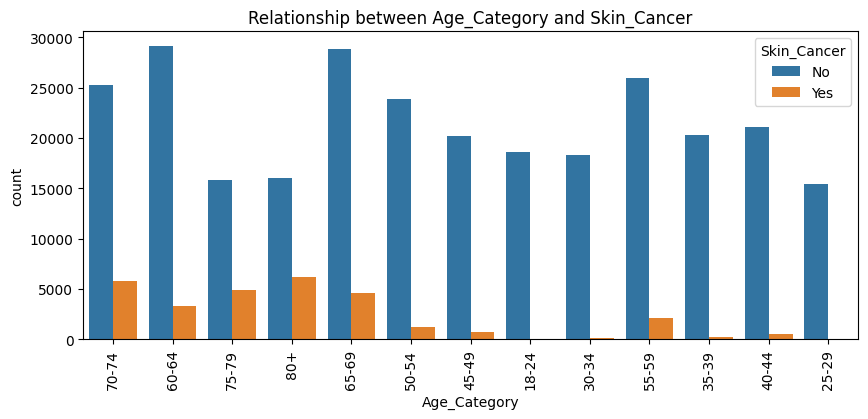

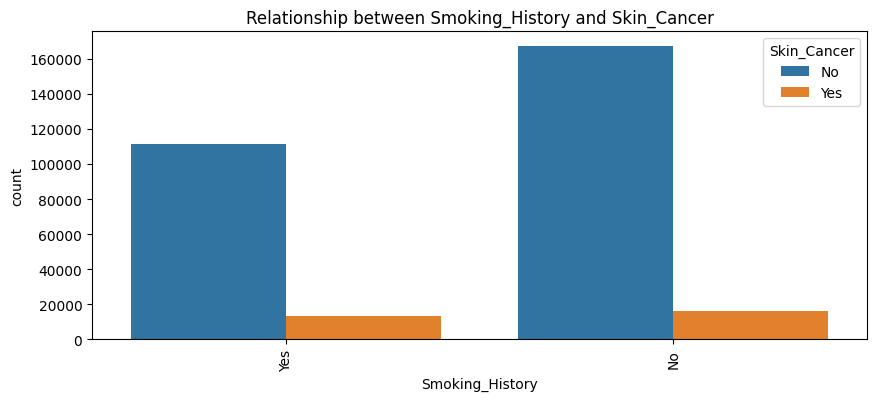

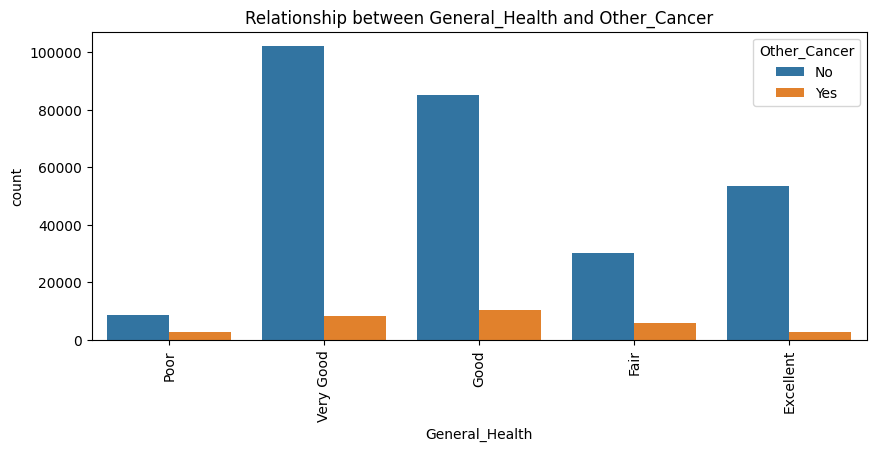

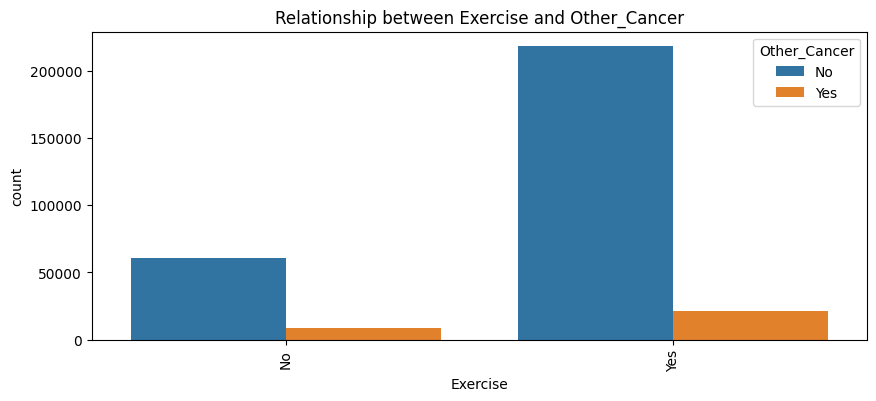

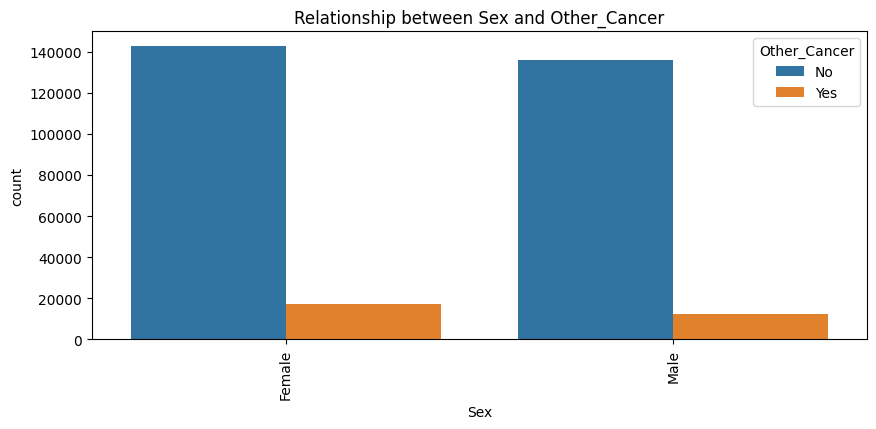

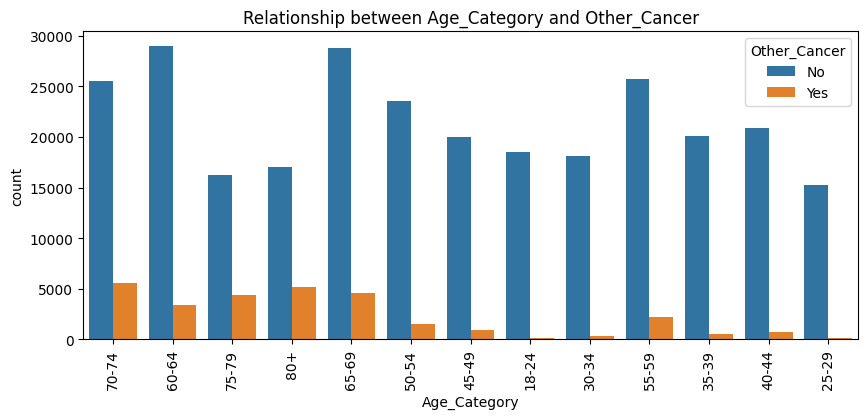

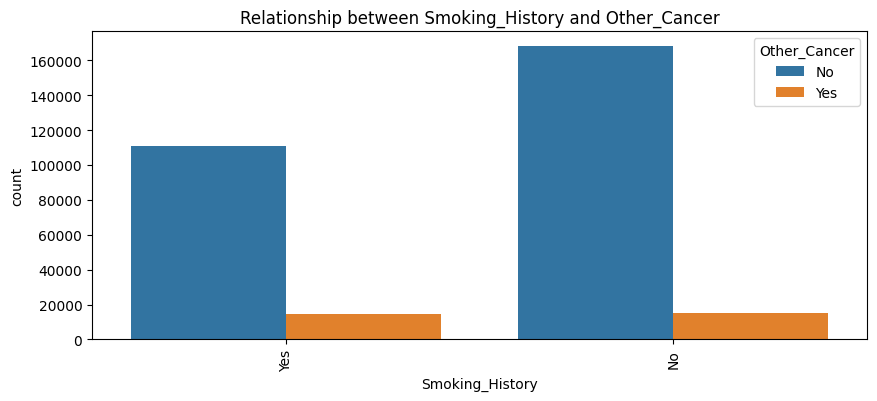

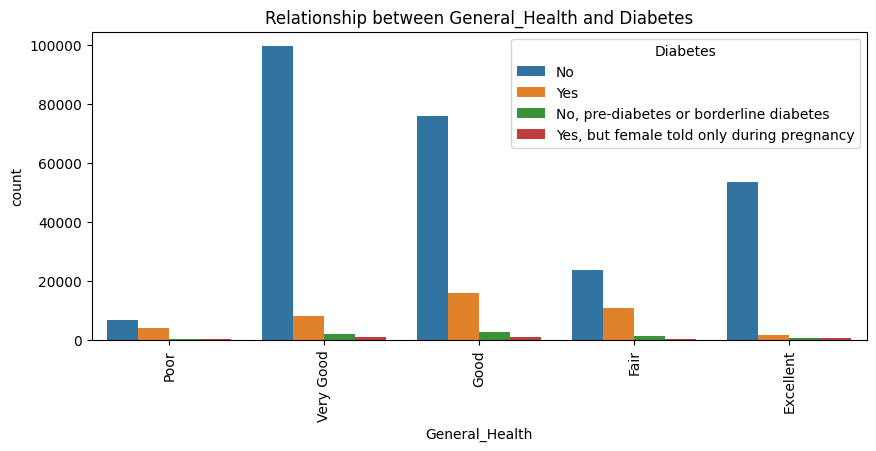

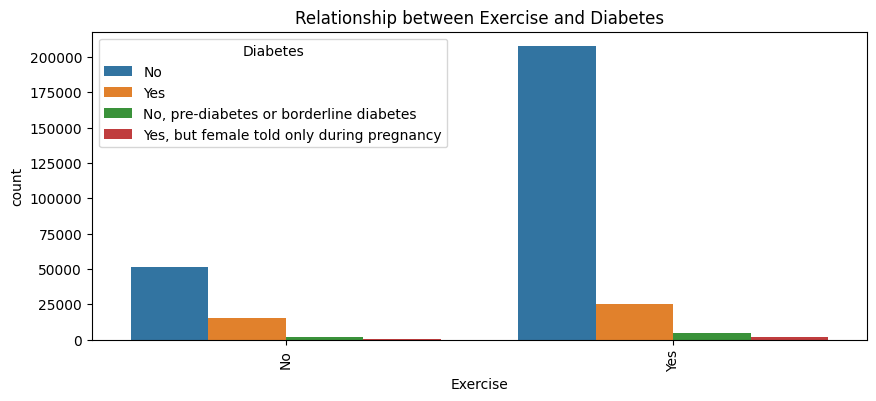

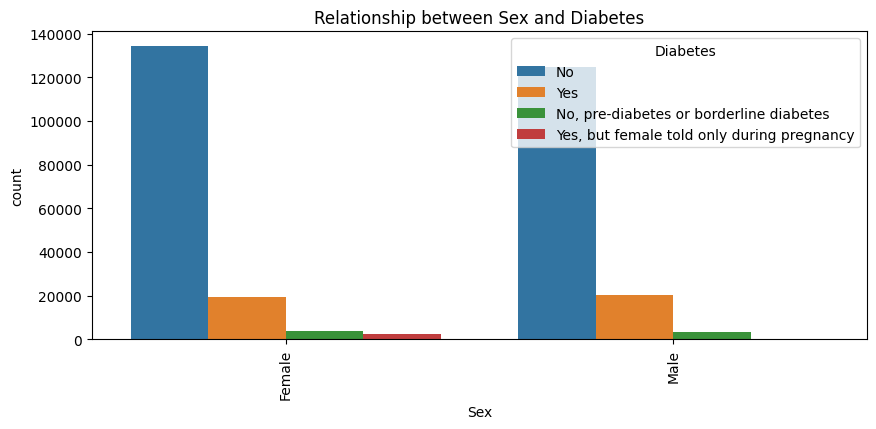

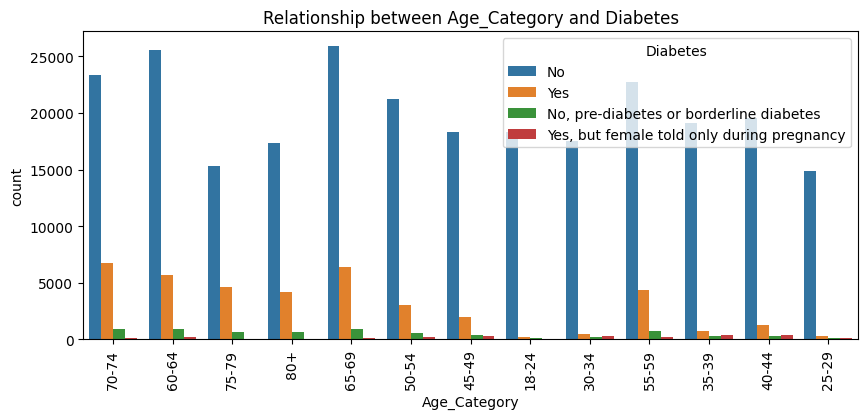

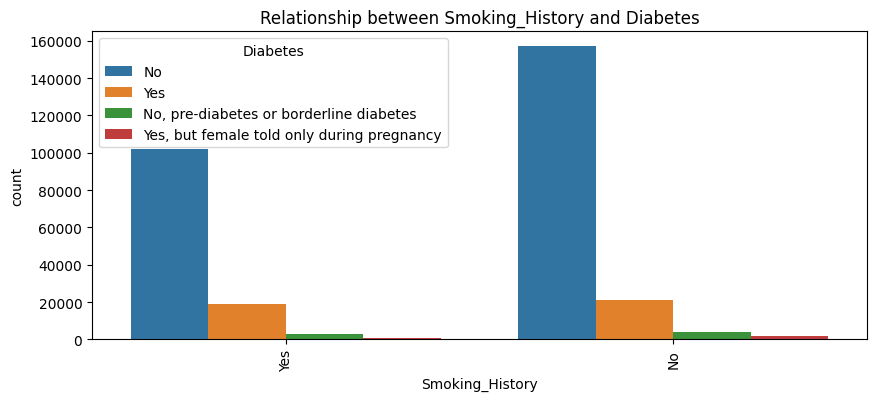

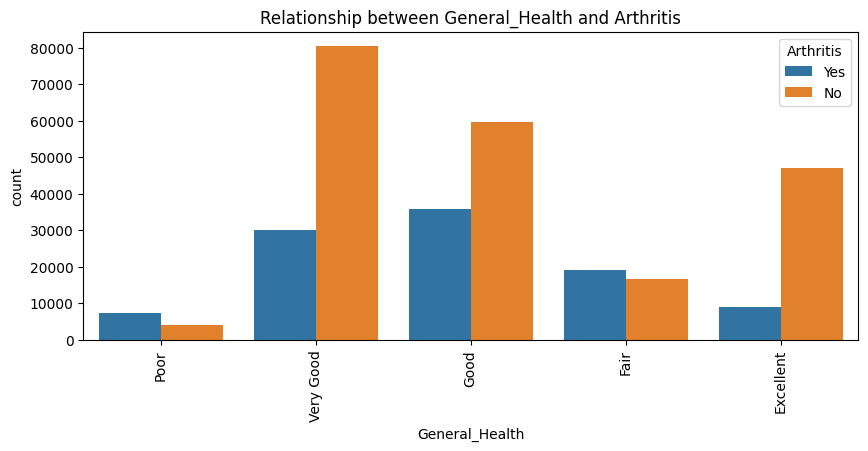

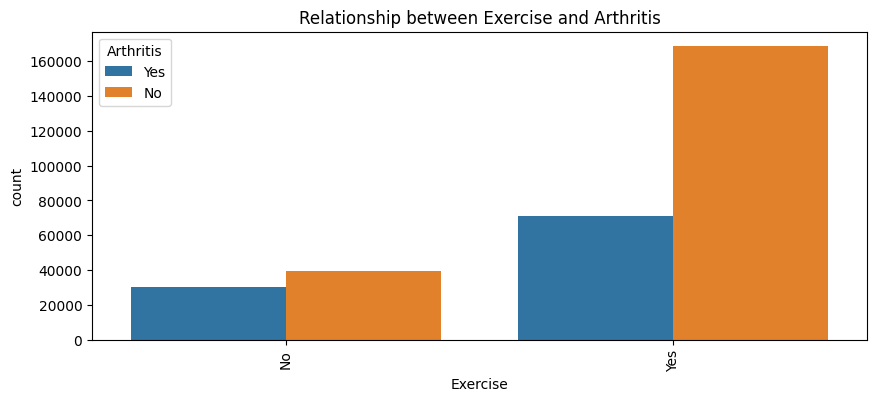

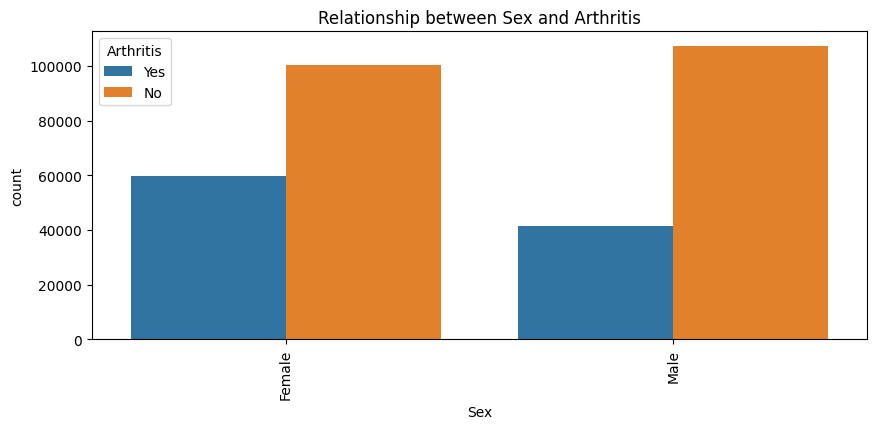

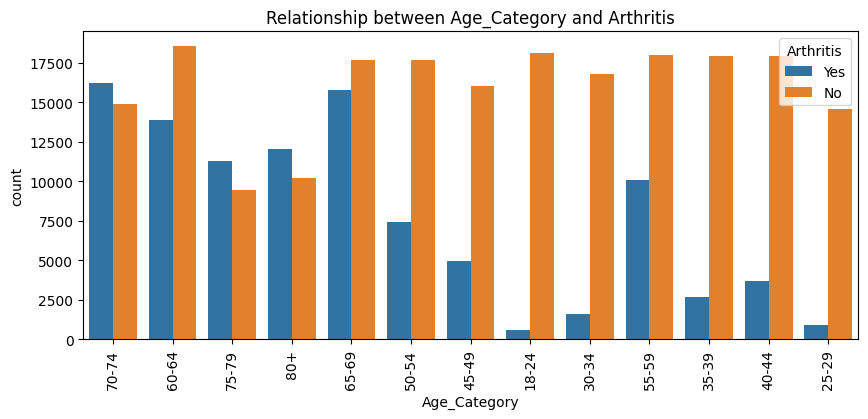

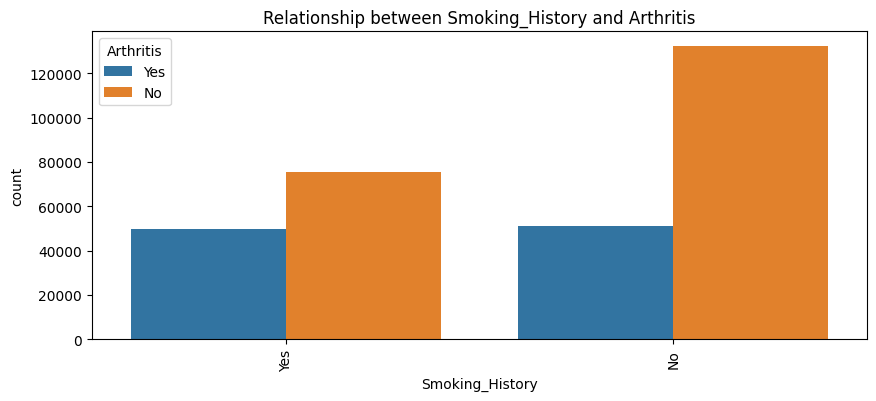

In [10]:
# Bivariate Analysis
# Analyze the relationship between the disease conditions and some selected variables

selected_variables = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History']

disease_conditions = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis']

for disease in disease_conditions:
    for variable in selected_variables:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=data, x=variable, hue=disease)
        plt.title('Relationship between ' + variable + ' and ' + disease)
        plt.xticks(rotation=90)
        plt.show()

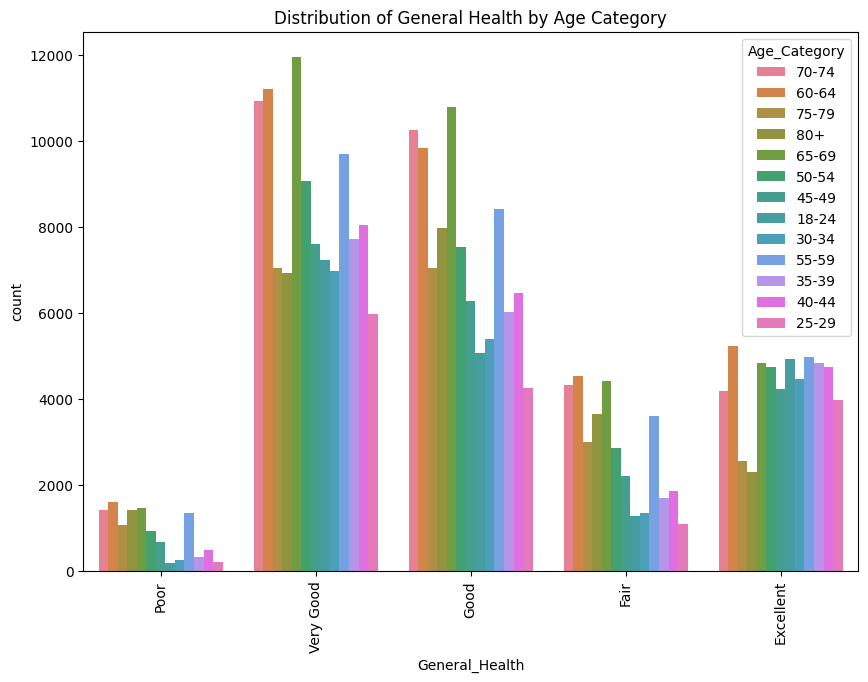

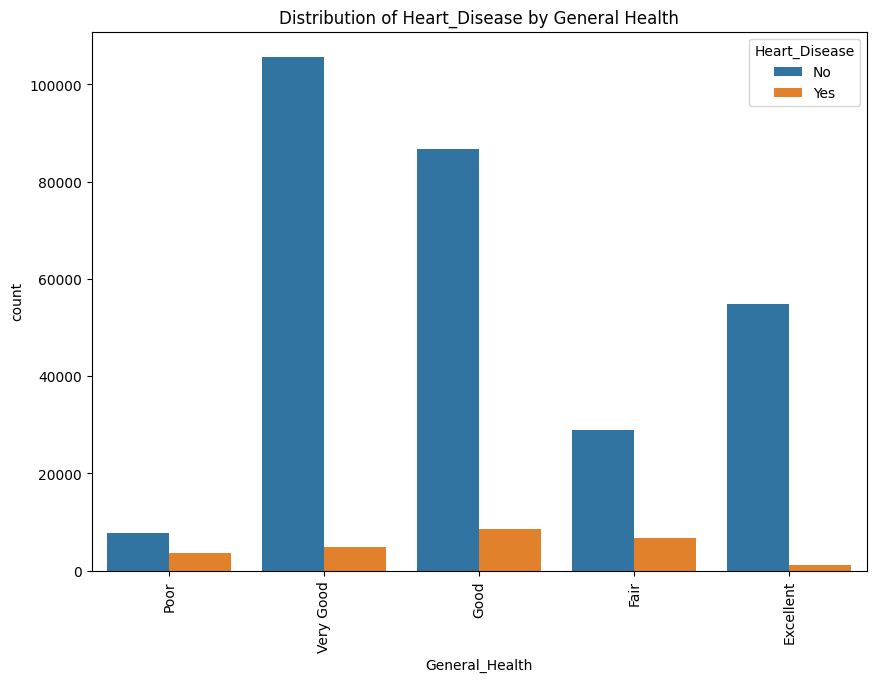

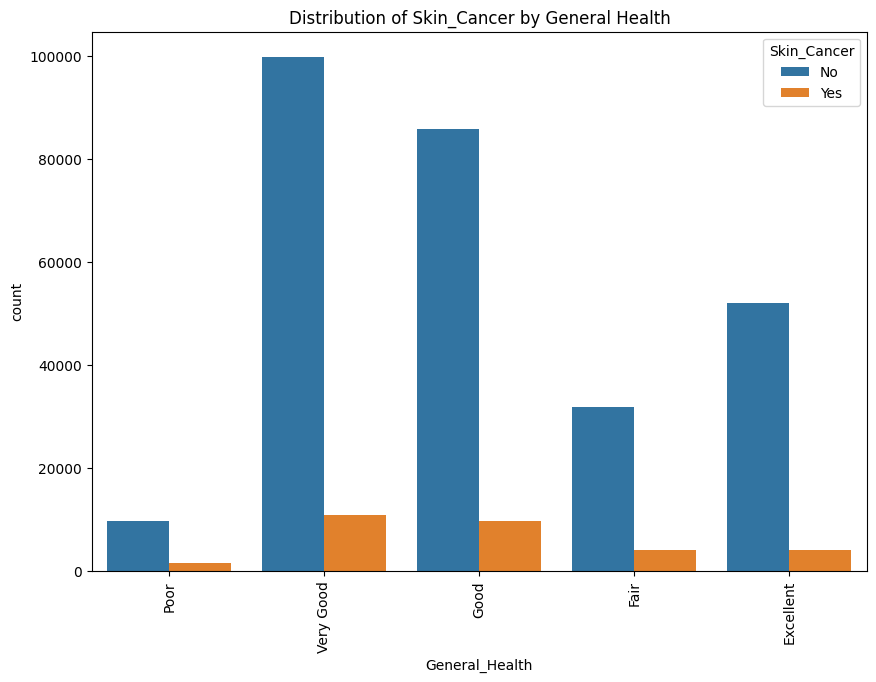

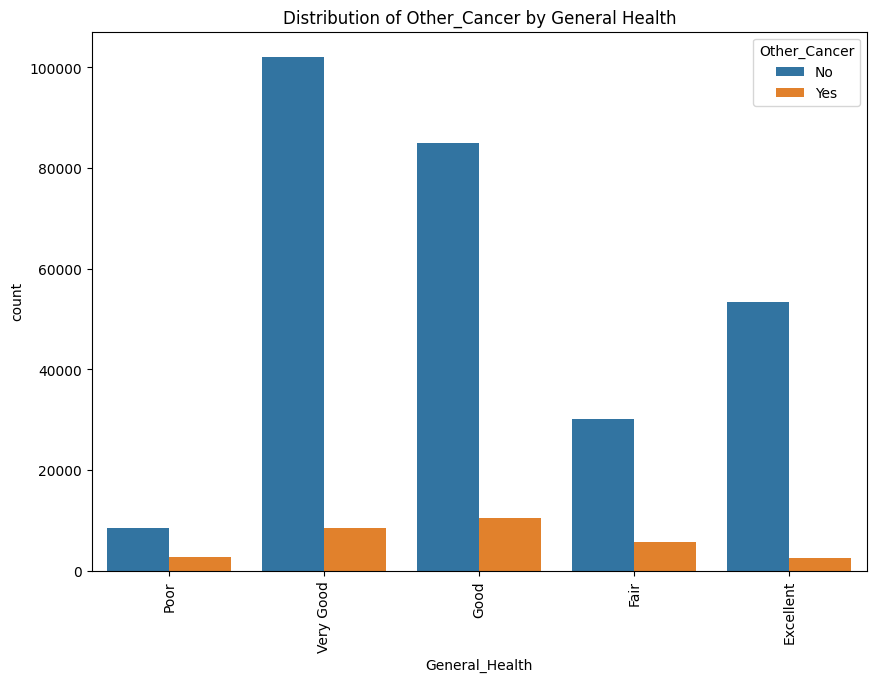

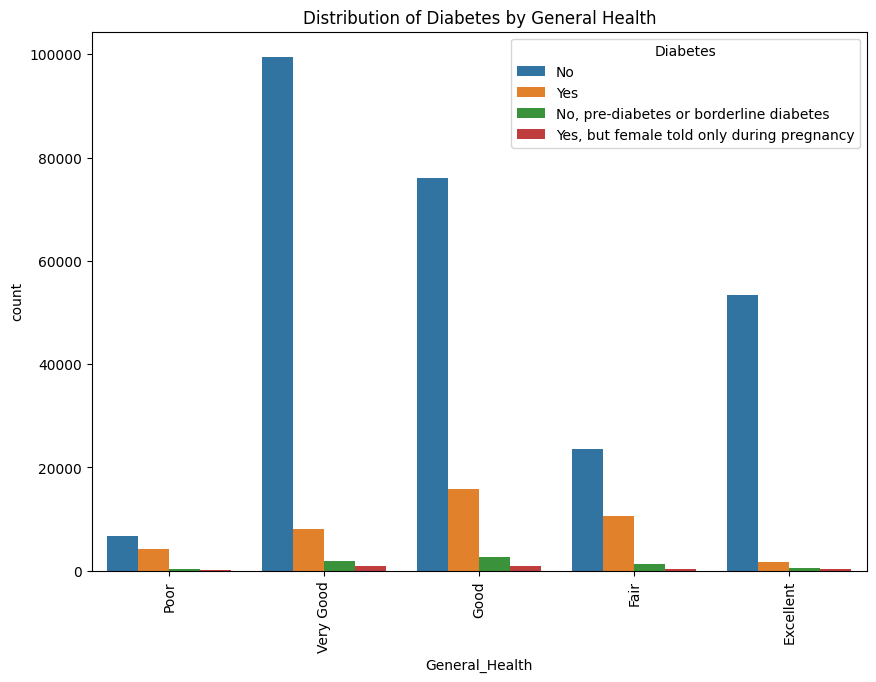

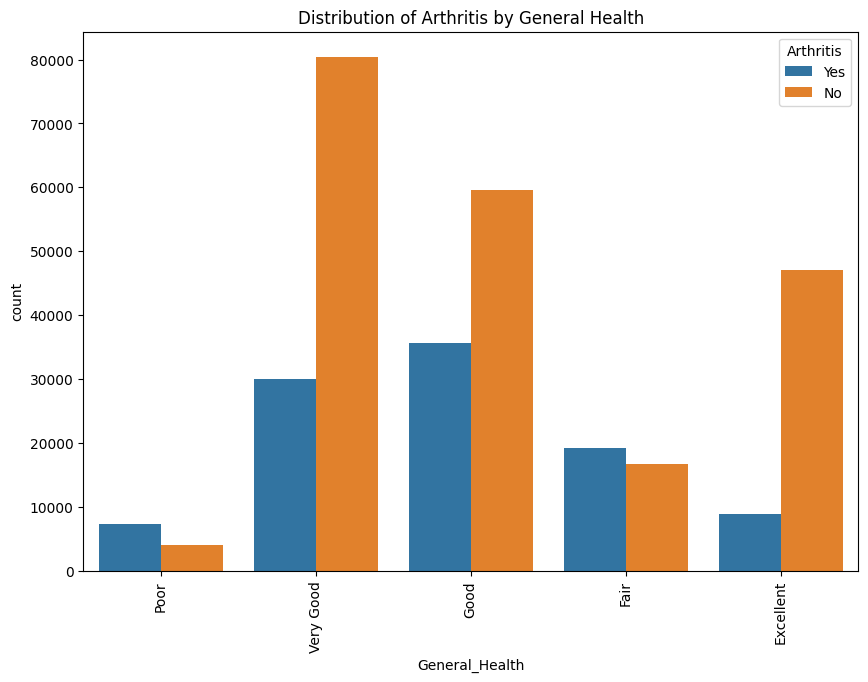

In [11]:
# Multivariate Analysis
# Analyze the relationship between disease conditions, general health, and age category

plt.figure(figsize=(10, 7))
sns.countplot(data=data, x='General_Health', hue='Age_Category')
plt.title('Distribution of General Health by Age Category')
plt.xticks(rotation=90)
plt.show()

for disease in disease_conditions:
    plt.figure(figsize=(10, 7))
    sns.countplot(data=data, x='General_Health', hue=disease)
    plt.title('Distribution of ' + disease + ' by General Health')
    plt.xticks(rotation=90)
    plt.show()

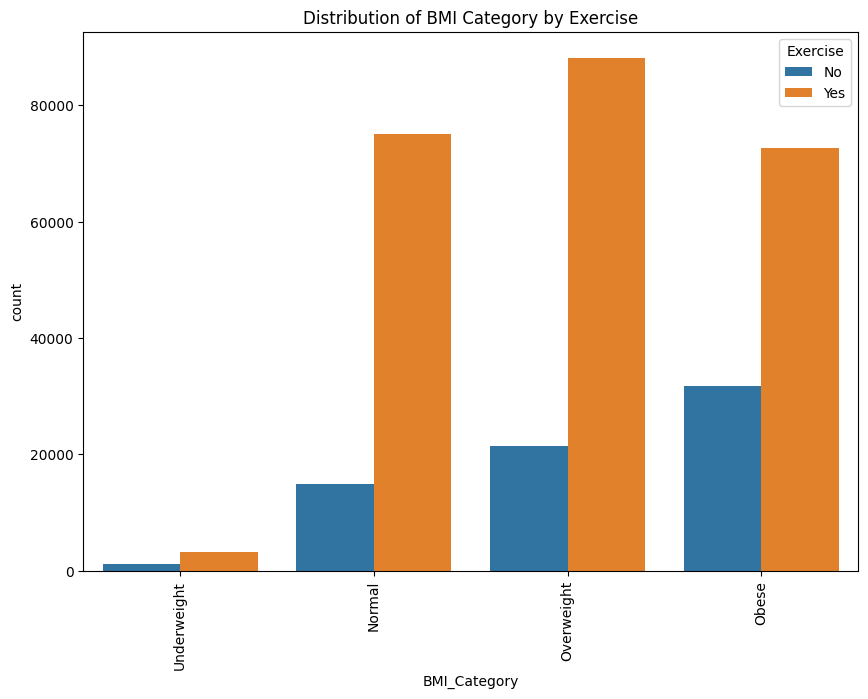

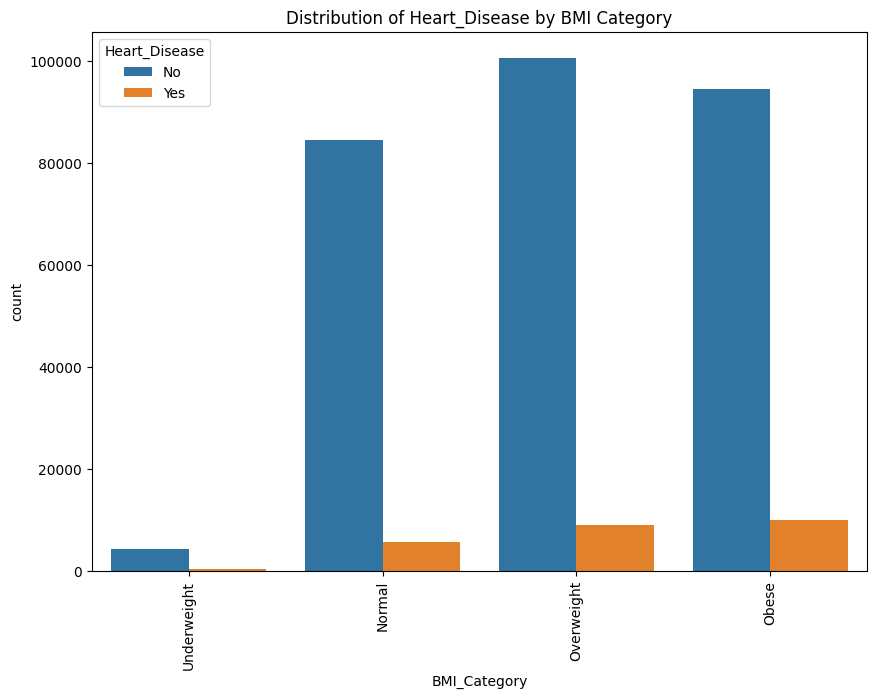

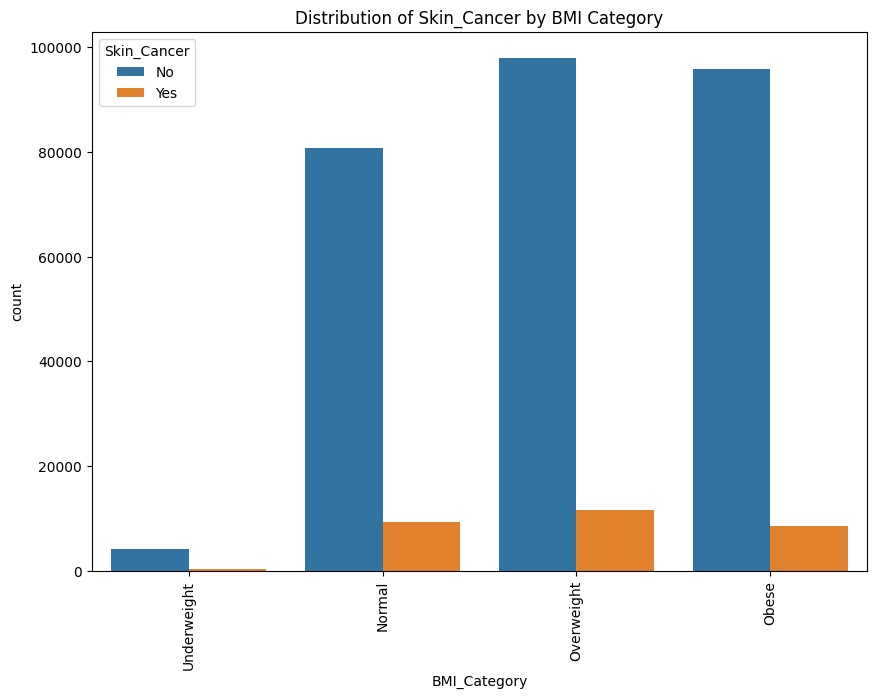

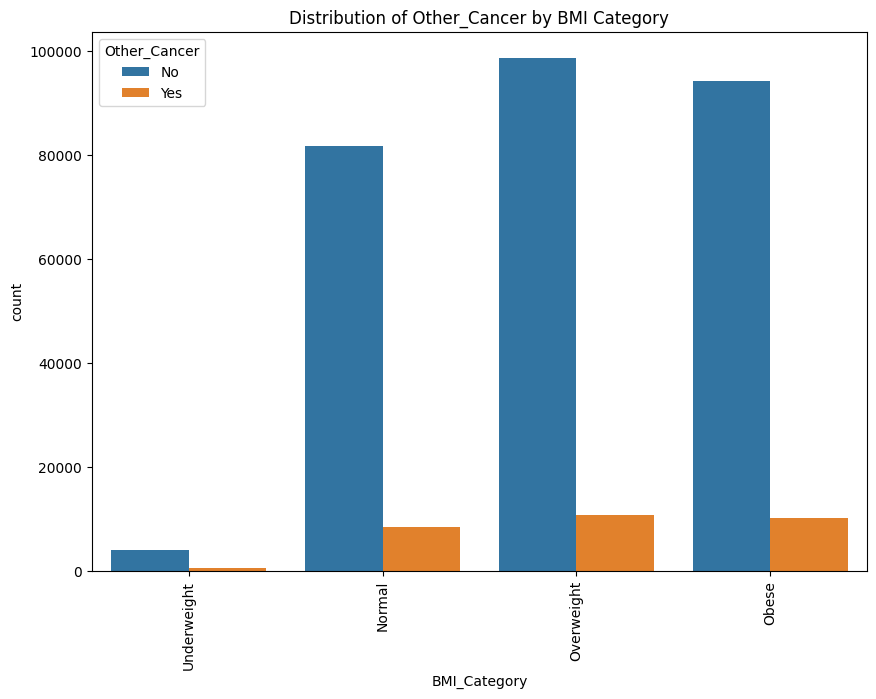

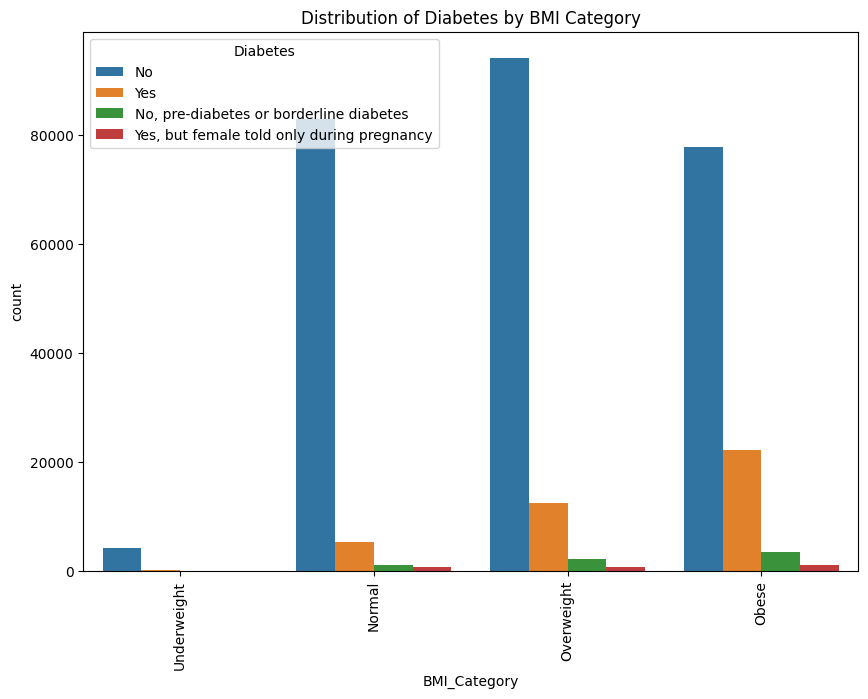

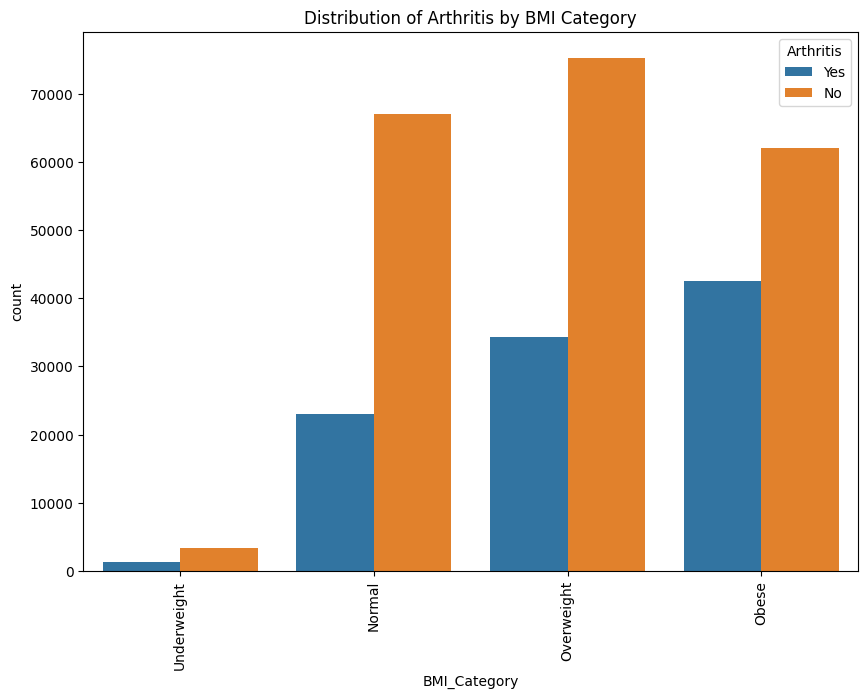

In [13]:
# Analyze the relationship between disease conditions, BMI, and exercise

# Creating a new BMI category
data['BMI_Category'] = pd.cut(data['BMI'], bins=[0,18.5,25,30,100], labels=['Underweight','Normal','Overweight','Obese'])

plt.figure(figsize=(10, 7))
sns.countplot(data=data, x='BMI_Category', hue='Exercise')
plt.title('Distribution of BMI Category by Exercise')
plt.xticks(rotation=90)
plt.show()

for disease in disease_conditions:
    plt.figure(figsize=(10, 7))
    sns.countplot(data=data, x='BMI_Category', hue=disease)
    plt.title('Distribution of ' + disease + ' by BMI Category')
    plt.xticks(rotation=90)
    plt.show()


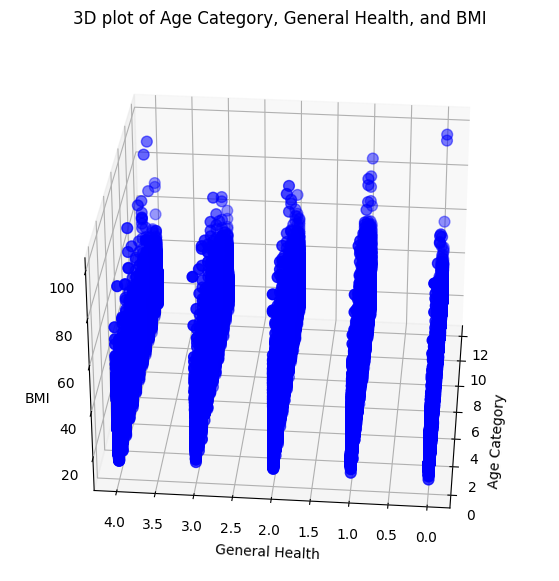

In [14]:
# We need to encode categorical variables to numerical values for 3D plotting
le = LabelEncoder()

# Selecting three features for 3D plot: Age_Category, General_Health, and BMI
data_3D = data[['Age_Category', 'General_Health', 'BMI']].copy()

# Encode the categorical variables
data_3D['Age_Category'] = le.fit_transform(data_3D['Age_Category'])
data_3D['General_Health'] = le.fit_transform(data_3D['General_Health'])

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3D['Age_Category'], data_3D['General_Health'], data_3D['BMI'], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age Category")
plt.ylabel("General Health")
ax.set_zlabel('BMI')
plt.title('3D plot of Age Category, General Health, and BMI')
plt.show()



In [17]:
# Re-import the dataset
data = pd.read_csv('/CVD_cleaned.csv')

# Mapping for Diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0,
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# One-hot encoding for Sex
data = pd.get_dummies(data, columns=['Sex'])

# Convert remaining categorical variables with "Yes" and "No" values to binary format for correlation computation
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']

for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# Ordinal encoding for General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.2,
    'Within the past 5 years': 1,
    'Within the past 2 years': 2,
    'Within the past year': 4

}
data['Checkup'] = data['Checkup'].map(checkup_mapping)


age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)


# Display the first few rows of the cleaned dataset
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex_Female,Sex_Male
0,0,2.0,0,0,0,0,0,0,1,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,1,0
1,3,4.0,0,1,0,0,0,1,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,1,0
2,3,4.0,1,0,0,0,0,1,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,1,0
3,0,4.0,1,1,0,0,0,1,0,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,0,1
4,2,4.0,0,0,0,0,0,0,0,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,0,1


In [18]:
# Remove duplicate rows
data = data.drop_duplicates()

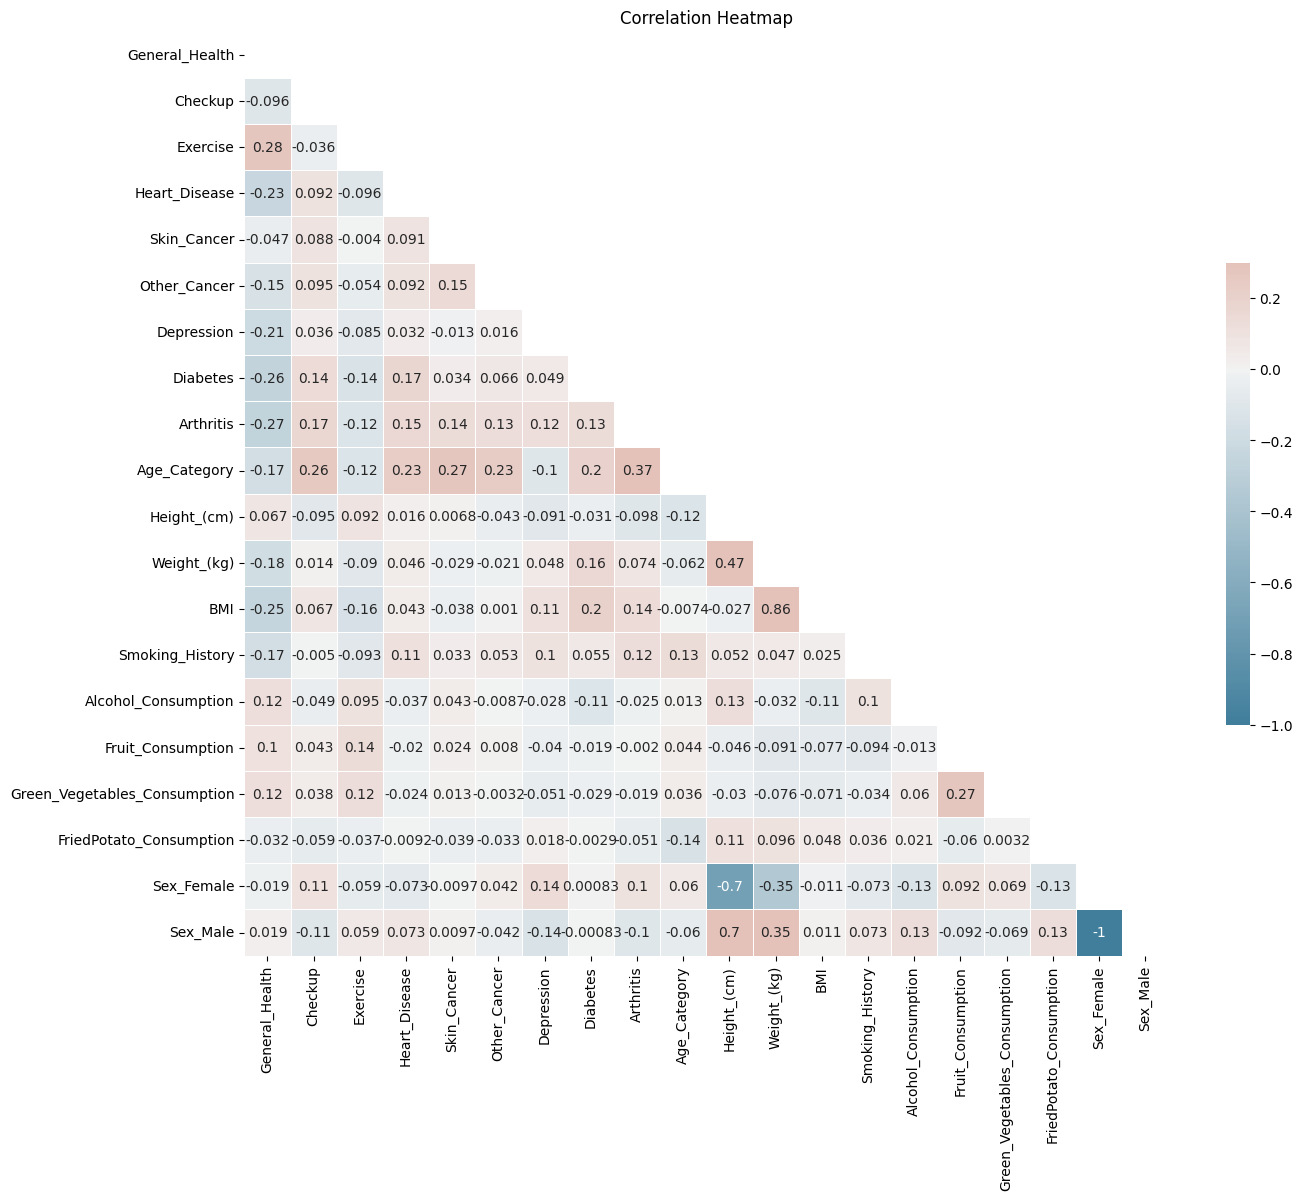

In [19]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()


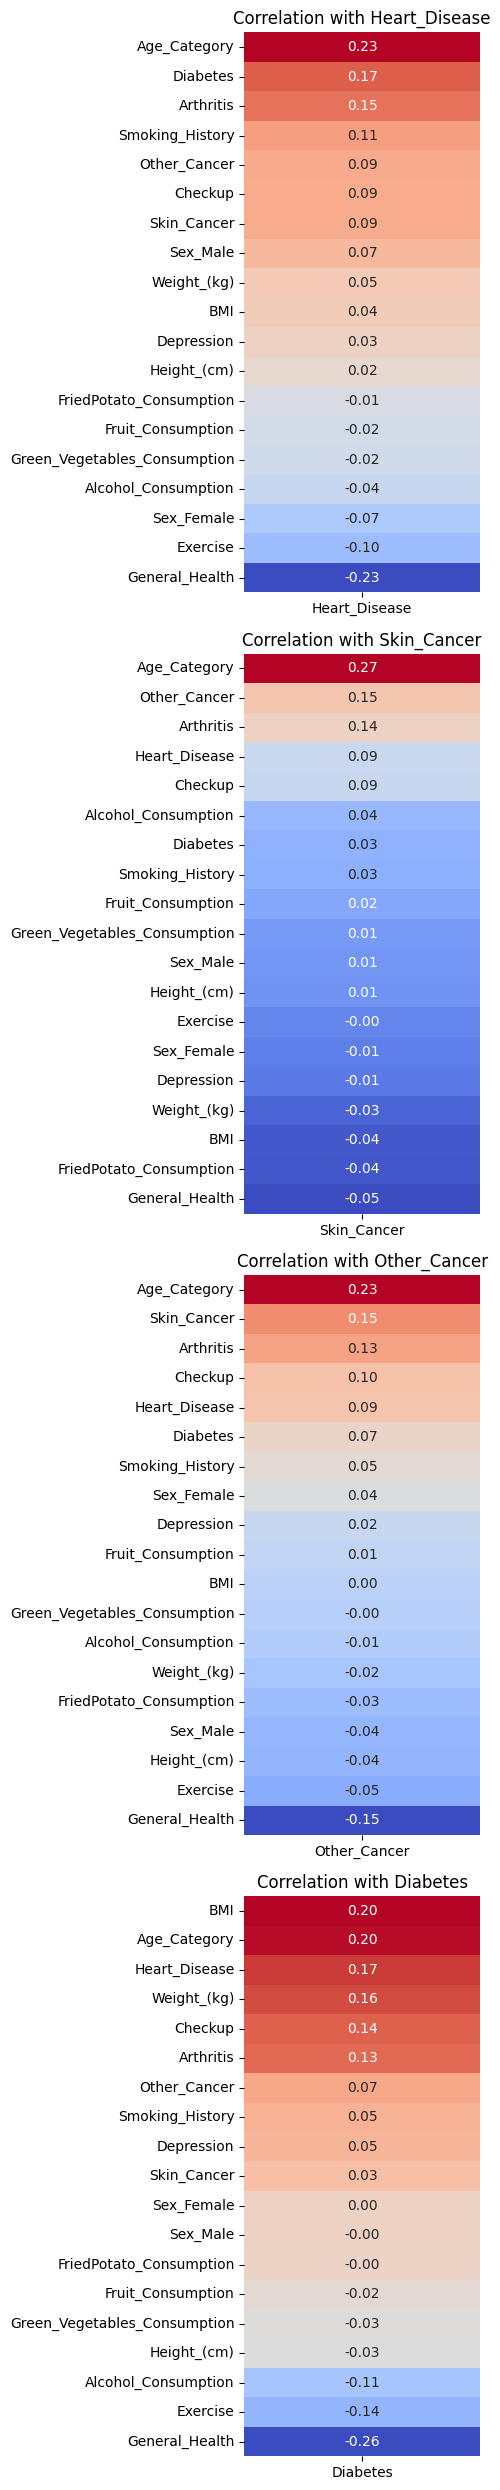

In [21]:
# Compute the correlation of each feature with the disease variables
disease_variables = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes']

# Compute the correlation matrix
corr = data.corr()

# Create a subplot for each disease
fig, axs = plt.subplots(len(disease_variables), 1, figsize=(5, 25))

for ax, disease in zip(axs, disease_variables):
    # Compute the correlation with the disease
    target_corr = corr[disease].drop(disease)

    # Sort correlation values in descending order
    target_corr_sorted = target_corr.sort_values(ascending=False)

    # Plot a heatmap of the correlations with the disease
    sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=False, ax=ax)
    ax.set_title('Correlation with ' + disease)

plt.tight_layout()
plt.show()


In [22]:
# Re-import the dataset
data = pd.read_csv('/CVD_cleaned.csv')

In [23]:
# Check for missing values in each column
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

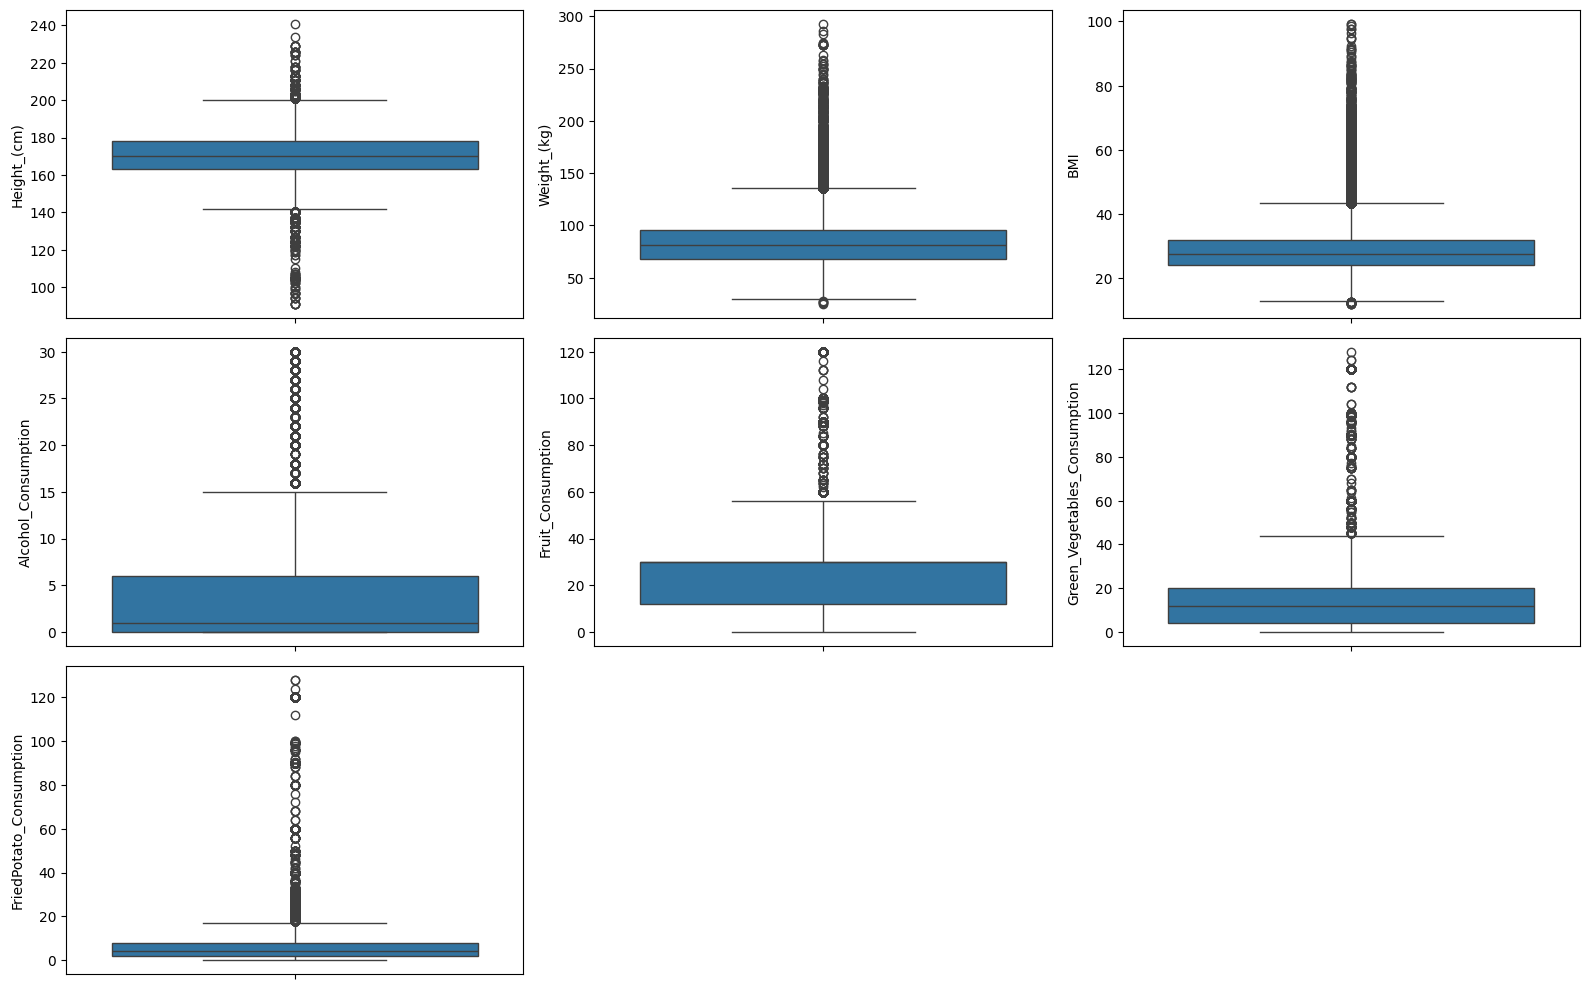

In [24]:
# List of numerical columns
numerical_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
                  'Fruit_Consumption', 'Green_Vegetables_Consumption',
                  'FriedPotato_Consumption']

# Create box plots
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])

plt.tight_layout()

In [25]:
# Summary statistics
summary_stats = data[numerical_cols].describe()
summary_stats

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [26]:
# Count duplicates
duplicate_count = data.duplicated().sum()

# Print the count
print("Number of duplicates:", duplicate_count)

Number of duplicates: 80


In [27]:
# Remove duplicate rows
data = data.drop_duplicates()


In [29]:
# BMI Category
data['BMI_Category'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity'])

# Health Checkup Frequency
checkup_mapping = {'Within the past year': 4, 'Within the past 2 years': 2, 'Within the past 5 years': 1, '5 or more years ago': 0.2, 'Never': 0}
data['Checkup_Frequency'] = data['Checkup'].replace(checkup_mapping)

# Lifestyle Score
exercise_mapping = {'Yes': 1, 'No': 0}
smoking_mapping = {'Yes': -1, 'No': 0}
data['Lifestyle_Score'] = data['Exercise'].replace(exercise_mapping) - data['Smoking_History'].replace(smoking_mapping) + data['Fruit_Consumption']/10 + data['Green_Vegetables_Consumption']/10 - data['Alcohol_Consumption']/10

# Healthy Diet Score
data['Healthy_Diet_Score'] = data['Fruit_Consumption']/10 + data['Green_Vegetables_Consumption']/10 - data['FriedPotato_Consumption']/10

# Interaction Terms
data['Smoking_Alcohol'] = data['Smoking_History'].replace(smoking_mapping) * data['Alcohol_Consumption']
data['Checkup_Exercise'] = data['Checkup_Frequency'] * data['Exercise'].replace(exercise_mapping)

# Ratio of Height to Weight
data['Height_to_Weight'] = data['Height_(cm)'] / data['Weight_(kg)']

# Fruit and Vegetables Consumption Interaction
data['Fruit_Vegetables'] = data['Fruit_Consumption'] * data['Green_Vegetables_Consumption']

# Healthy_Diet_Lifestyle Interaction
data['HealthyDiet_Lifestyle'] = data['Healthy_Diet_Score'] * data['Lifestyle_Score']

# Alcohol_FriedPotato Interaction
data['Alcohol_FriedPotato'] = data['Alcohol_Consumption'] * data['FriedPotato_Consumption']

In [30]:
# Mapping for Diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0,
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# One-hot encoding for Sex
data = pd.get_dummies(data, columns=['Sex'])

# Convert remaining categorical variables with "Yes" and "No" values to binary format for correlation computation
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']

for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# Ordinal encoding for General_Health, Age_Category,BMI_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
data['General_Health'] = data['General_Health'].map(general_health_mapping)

bmi_mapping = {
    'Underweight': 0,
    'Normal weight': 1,
    'Overweight': 2,
    'Obesity': 3
}

data['BMI_Category'] = data['BMI_Category'].map(bmi_mapping).astype(int)

age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)

data = data.drop(["Checkup"],axis=1)

In [31]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

In [32]:
# Define the features and target
X = data.drop('Heart_Disease', axis=1)
y = data['Heart_Disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Define the pipeline
resampling = SMOTE(sampling_strategy='minority') # resampling strategy is set to 'minority' to resample the minority class
tomek = TomekLinks(sampling_strategy='majority') # sampling strategy is set to 'majority' to undersample the majority class
scaler = MinMaxScaler()
model = XGBClassifier(scale_pos_weight=sum(y==0)/sum(y==1), # adjust class weights due to class imbalance
                      eval_metric='logloss', # use logloss to evaluate performance
                      use_label_encoder=False) # to avoid warning message
pipeline = Pipeline([('MinMaxScale', scaler), ('SMOTE', resampling), ('TomekLinks', tomek), ('Model', model)])


***Making A Prediction***

In [34]:
# Define the model with default hyperparameters
model = XGBClassifier(
    scale_pos_weight=sum(y_train==0)/sum(y_train==1), # adjust class weights due to class imbalance
    eval_metric='logloss', # use logloss to evaluate performance
    use_label_encoder=False # to avoid warning message
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)[:,1]

In [35]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     56677
           1       0.21      0.76      0.33      5078

    accuracy                           0.74     61755
   macro avg       0.59      0.75      0.59     61755
weighted avg       0.91      0.74      0.80     61755



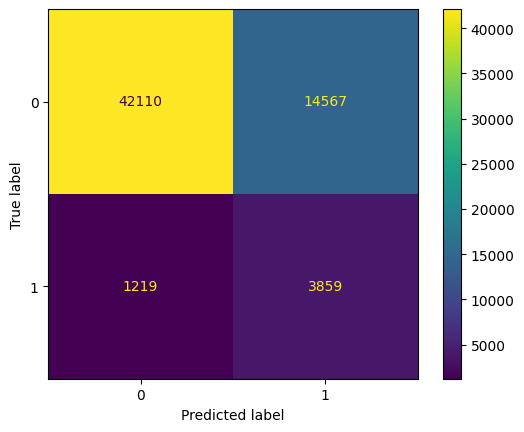

In [36]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()

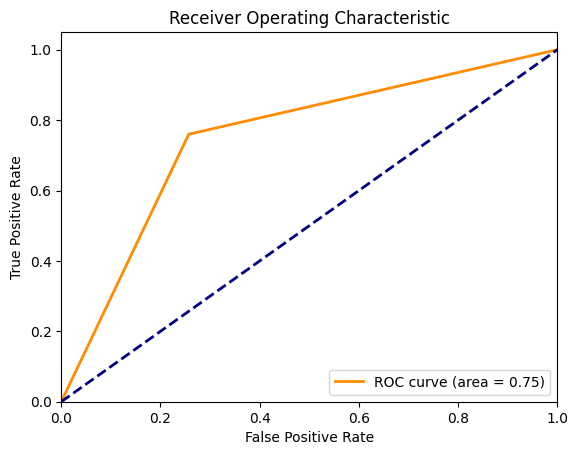

In [37]:
# Compute ROC curve and ROC area
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curve
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

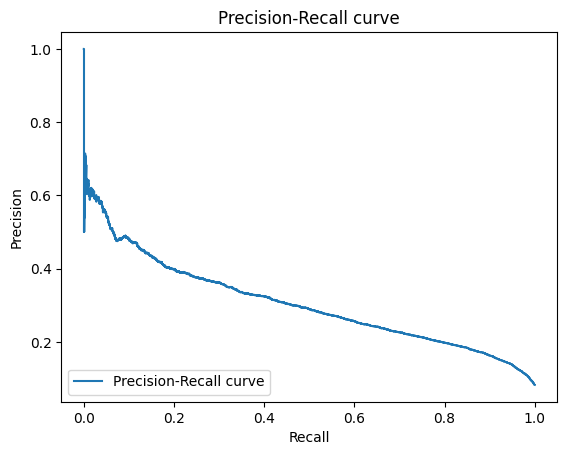

In [38]:
# Plot the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

plt.show()


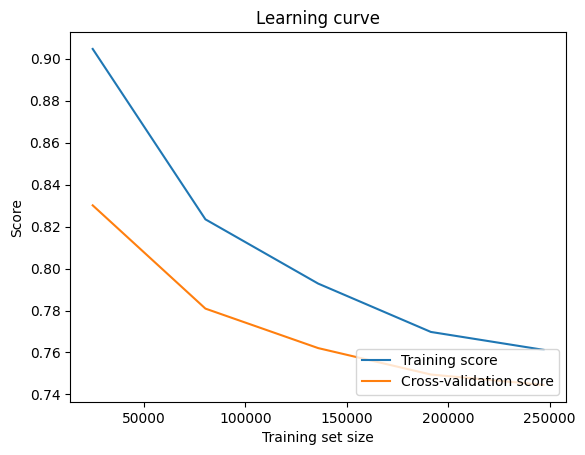

In [39]:
# Plot the learning curve
train_sizes, train_scores, valid_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning curve')
plt.legend(loc="lower right")
plt.show()
